In [4]:
import pandas as pd

In [5]:
import pycaret

In [6]:
from pycaret.regression import *

In [7]:
df = pd.read_csv('sonoma_shelter_ML_test.csv')

In [8]:
df

,Animal Type_CAT,Animal Type_DOG,Sex_Female,Sex_Male,Sex_Neutered,Sex_Spayed,Sex_Unknown,Size_KITTN,Size_LARGE,Size_MED,Size_PUPPY,Size_SMALL,Size_TOY,Size_X-LRG,Intake Type_ADOPTION RETURN,Intake Type_CONFISCATE,Intake Type_OWNER SURRENDER,Intake Type_QUARANTINE,Intake Type_STRAY,Intake Type_TRANSFER,Outcome Type_ADOPTION RETURN,Intake Condition_HEALTHY,Intake Condition_TREATABLE/MANAGEABLE,Intake Condition_TREATABLE/REHAB,Intake Condition_UNKNOWN,Intake Condition_UNTREATABLE,Intake Jurisdiction_*CLOVERDALE,Intake Jurisdiction_*COTATI,Intake Jurisdiction_*HEALDSBURG,Intake Jurisdiction_*PETALUMA,Intake Jurisdiction_*ROHNERT PARK,Intake Jurisdiction_*SEBASTOPOL,Intake Jurisdiction_*SONOMA,Intake Jurisdiction_*TRIBAL RESV,Intake Jurisdiction_*WINDSOR,Intake Jurisdiction_COUNTY,Intake Jurisdiction_OUT OF COUNTY,Intake Jurisdiction_SANTA ROSA,Intake Jurisdiction_UNKNOWN,Days in Shelter_y,Age at Intake_y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.08,-0.099075
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.32,1.100567
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.24,-0.316920
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.36,-0.222620
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.40,-0.153387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.12,1.100567
8767,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.48,0.880931
8768,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.04,0.224411
8769,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.48,0.444643


In [9]:
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7894, 41)
Unseen Data For Predictions: (877, 41)


In [11]:
# exp_reg101 = setup(data = df,
#                    target = 'Outcome Type_ADOPTION RETURN',
#                    ignore_features = ['listing image','listing url','full address','zipcode']) 
exp_reg101 = setup(data = df,
                   target = 'Outcome Type_ADOPTION RETURN')

,Description,Value
0,session_id,6603
1,Target,Outcome Type_ADOPTION RETURN
2,Original Data,"(8771, 41)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(6139, 38)"


In [12]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2741,0.1326,0.3641,0.3394,0.0000,0.1884,0.1480
br,Bayesian Ridge,0.2915,0.1428,0.3778,0.2887,0.0000,0.1990,0.0090
ridge,Ridge Regression,0.2910,0.1430,0.3781,0.2878,0.0000,0.1985,0.0080
lr,Linear Regression,0.2910,0.1433,0.3785,0.2862,0.0000,0.1985,0.5320
lar,Least Angle Regression,0.2910,0.1433,0.3785,0.2862,0.0000,0.1985,0.0080
rf,Random Forest Regressor,0.2666,0.1472,0.3835,0.2669,0.0000,0.1943,0.4260
omp,Orthogonal Matching Pursuit,0.3152,0.1570,0.3961,0.2181,0.0000,0.2176,0.0080
ada,AdaBoost Regressor,0.3608,0.1624,0.4029,0.1909,0.0000,0.3021,0.0240
et,Extra Trees Regressor,0.2602,0.1807,0.4250,0.0995,0.0000,0.1884,0.4110
huber,Huber Regressor,0.2202,0.1923,0.4381,0.0439,0.0000,0.0327,0.1110


In [13]:
model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2890,0.1459,0.3820,0.3089,-0.0000,0.1943
1,0.2784,0.1387,0.3724,0.3585,-0.0000,0.1772
2,0.2743,0.1308,0.3617,0.3183,-0.0000,0.1918
3,0.2668,0.1279,0.3577,0.3514,-0.0000,0.1890
4,0.2710,0.1321,0.3634,0.3474,-0.0000,0.1796
5,0.2675,0.1244,0.3527,0.3410,-0.0000,0.1975
6,0.2679,0.1275,0.3570,0.3634,-0.0000,0.1839
7,0.2708,0.1309,0.3618,0.3599,-0.0000,0.1835
8,0.2824,0.1391,0.3730,0.3151,-0.0000,0.1944


In [14]:
tuned_gbr = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2880,0.1478,0.3844,0.3001,-0.0000,0.1921
1,0.2727,0.1399,0.3740,0.3529,-0.0000,0.1715
2,0.2725,0.1333,0.3651,0.3053,-0.0000,0.1889
3,0.2621,0.1282,0.3581,0.3500,-0.0000,0.1850
4,0.2653,0.1322,0.3636,0.3466,-0.0000,0.1751
5,0.2584,0.1220,0.3493,0.3536,-0.0000,0.1859
6,0.2614,0.1255,0.3543,0.3729,-0.0000,0.1792
7,0.2772,0.1381,0.3716,0.3248,-0.0000,0.1916
8,0.2777,0.1399,0.3741,0.3110,-0.0000,0.1918


IntProgress(value=0, description='Processing: ', max=5)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

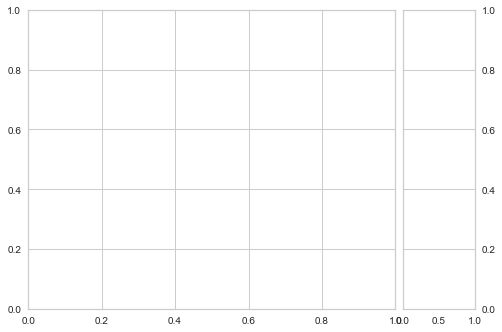

In [15]:
plot_model(tuned_gbr)

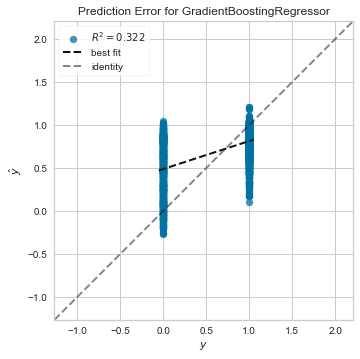

In [16]:
plot_model(tuned_gbr, plot = 'error')

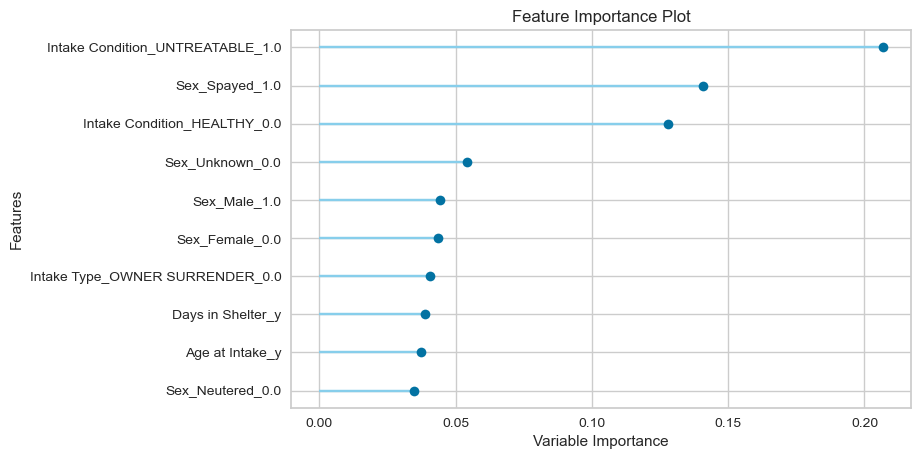

In [17]:
plot_model(tuned_gbr, plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

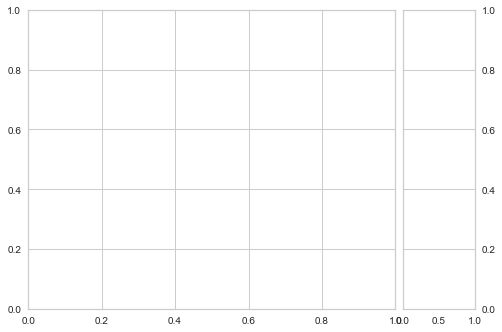

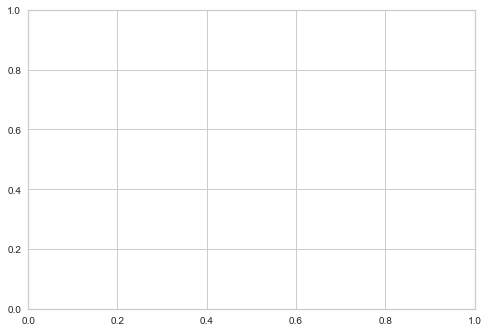

In [18]:
evaluate_model(tuned_gbr)

In [19]:
unseen_predictions = predict_model(tuned_gbr, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2670,0.1286,0.3586,0.3673,0.2522,0.1780


,Animal Type_CAT,Animal Type_DOG,Sex_Female,Sex_Male,Sex_Neutered,Sex_Spayed,Sex_Unknown,Size_KITTN,Size_LARGE,Size_MED,...,Intake Jurisdiction_*SONOMA,Intake Jurisdiction_*TRIBAL RESV,Intake Jurisdiction_*WINDSOR,Intake Jurisdiction_COUNTY,Intake Jurisdiction_OUT OF COUNTY,Intake Jurisdiction_SANTA ROSA,Intake Jurisdiction_UNKNOWN,Days in Shelter_y,Age at Intake_y,Label
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.12,-0.390331,0.881792
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.36,0.882722,0.874270
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.52,0.698299,0.444423
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.44,0.444643,0.910454
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.08,0.920919,0.683556
